In [16]:
import pandas as pd
from sktime.datasets import load_from_arff_to_dataframe, load_from_tsfile_to_dataframe
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mitbih_train = pd.read_csv("ECG/mitbih_train.csv", header=None)
mitbih_test = pd.read_csv("ECG/mitbih_test.csv", header=None)
ptbdb_abnormal = pd.read_csv('ECG/ptbdb_abnormal.csv')
ptbdb_normal = pd.read_csv('ECG/ptbdb_normal.csv')



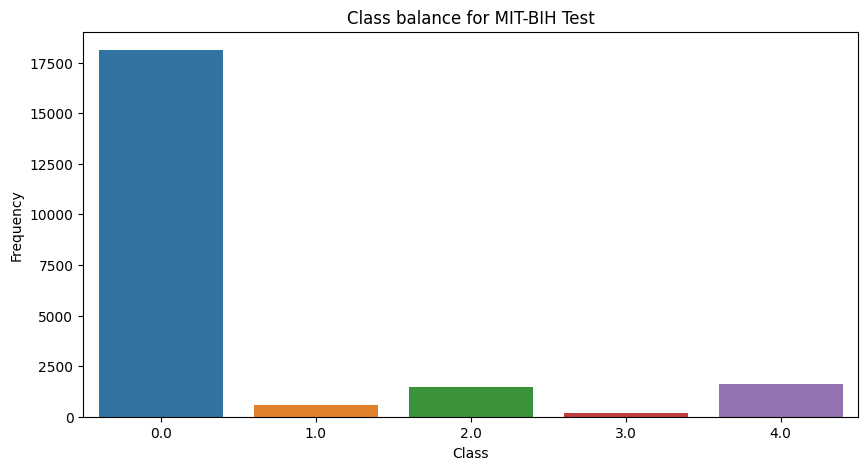

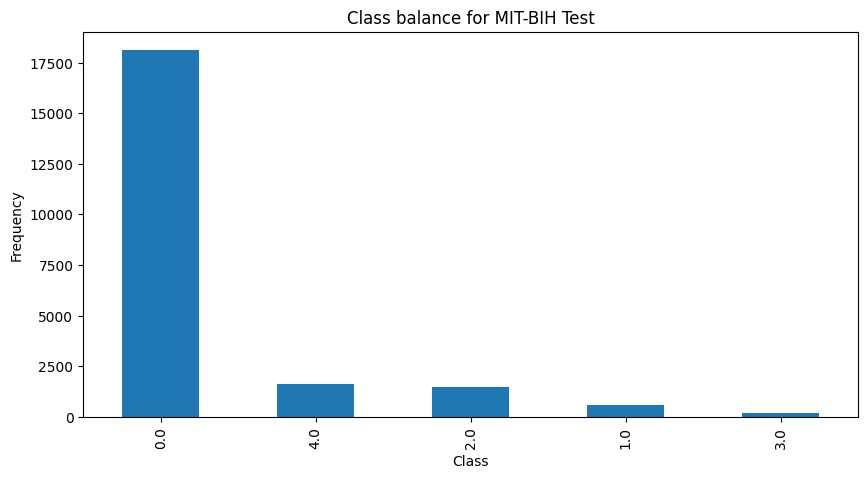

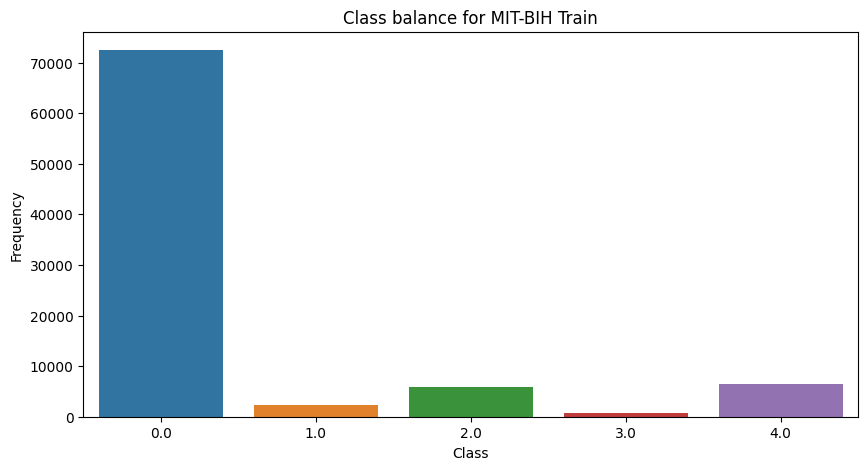

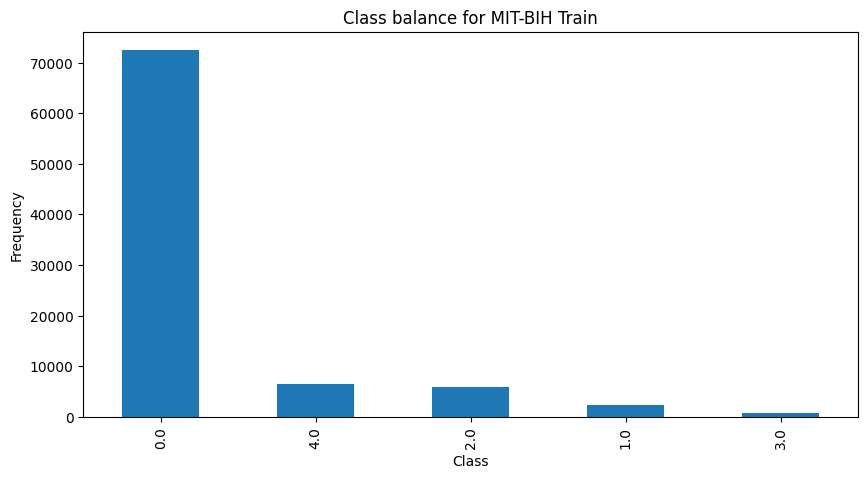

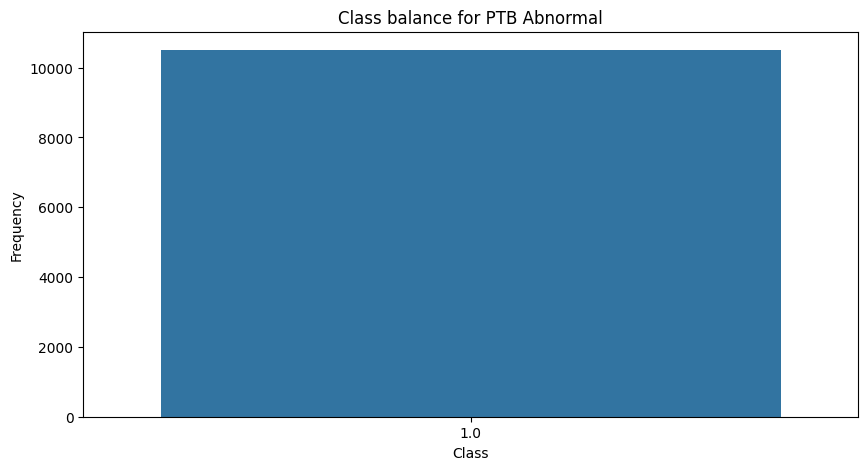

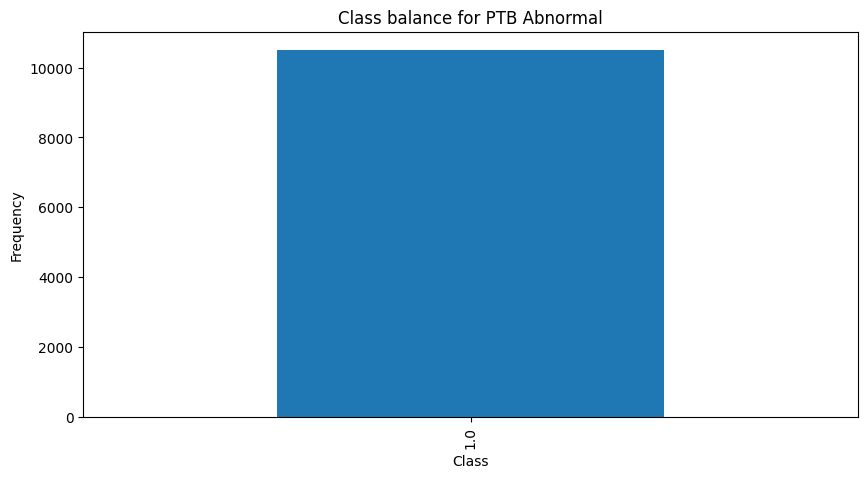

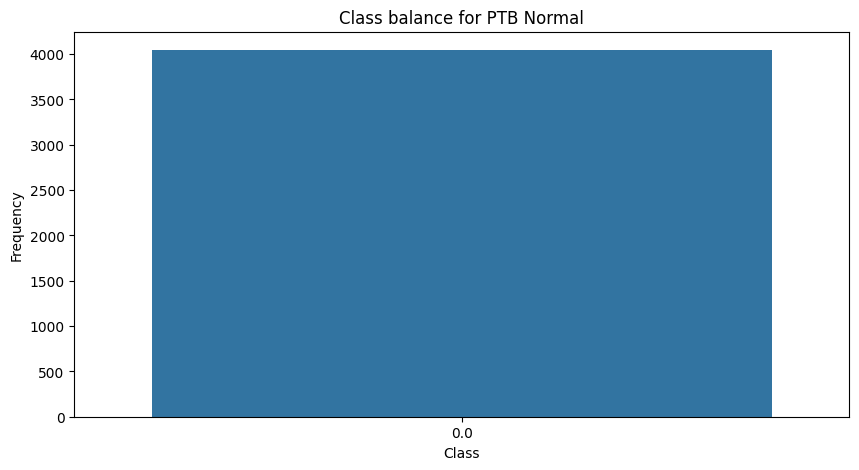

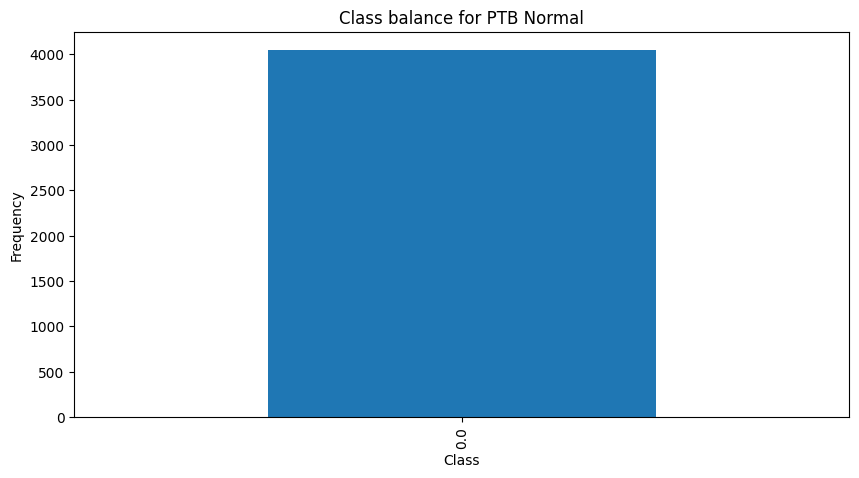

In [17]:
# Function to plot class balance using seaborn countplot
def plot_class_balance_seaborn(labels, dataset_name):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels)
    plt.title(f"Class balance for {dataset_name}")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

# Function to plot class balance using pandas DataFrame plot.bar
def plot_class_balance_pandas(labels, dataset_name):
    class_counts = labels.value_counts()
    plt.figure(figsize=(10, 5))
    class_counts.plot.bar()
    plt.title(f"Class balance for {dataset_name}")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()


# Class balance for MIT-BIH dataset
plot_class_balance_seaborn(mitbih_test.iloc[:, -1], "MIT-BIH Test")
plot_class_balance_pandas(mitbih_test.iloc[:, -1], "MIT-BIH Test")

# Class balance for MIT-BIH dataset
plot_class_balance_seaborn(mitbih_train.iloc[:, -1], "MIT-BIH Train")
plot_class_balance_pandas(mitbih_train.iloc[:, -1], "MIT-BIH Train")

# Class balance for PTB dataset
plot_class_balance_seaborn(ptbdb_abnormal.iloc[:, -1], "PTB Abnormal")
plot_class_balance_pandas(ptbdb_abnormal.iloc[:, -1], "PTB Abnormal")

plot_class_balance_seaborn(ptbdb_normal.iloc[:, -1], "PTB Normal")
plot_class_balance_pandas(ptbdb_normal.iloc[:, -1], "PTB Normal")

<a href="https://colab.research.google.com/github/cs-pub-ro/ML/blob/master/lab/lab8/Laborator_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:


def print_category_examples(df, labels, dataset_name):
    unique_categories = labels.unique()
    for category in unique_categories:
        category_indices = labels[labels == category].index
        category_example_index = category_indices[0]
        category_example = df.iloc[category_example_index]
        
        print(f"Example from Category {category} in {dataset_name} dataset:")
        print(category_example)
        print("\n")

# MIT-BIH dataset
mitbih_train_labels = mitbih_train.iloc[:, -1]
print_category_examples(mitbih_train, mitbih_train_labels, "MIT-BIH Train")

mitbih_test_labels = mitbih_test.iloc[:, -1]
print_category_examples(mitbih_test, mitbih_test_labels, "MIT-BIH Test")

# PTB dataset
ptbdb_abnormal_labels = ptbdb_abnormal.iloc[:, -1]
ptbdb_normal_labels = ptbdb_normal.iloc[:, -1]
print_category_examples(ptbdb_abnormal, ptbdb_abnormal_labels, "PTB Abnormal")
print_category_examples(ptbdb_normal, ptbdb_normal_labels, "PTB Normal")

Example from Category 0.0 in MIT-BIH Train dataset:
0      0.977941
1      0.926471
2      0.681373
3      0.245098
4      0.154412
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
Name: 0, Length: 188, dtype: float64


Example from Category 1.0 in MIT-BIH Train dataset:
0      1.000000
1      0.666667
2      0.100457
3      0.036530
4      0.073059
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    1.000000
Name: 72471, Length: 188, dtype: float64


Example from Category 2.0 in MIT-BIH Train dataset:
0      0.000000
1      0.009756
2      0.074390
3      0.162195
4      0.240244
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    2.000000
Name: 74694, Length: 188, dtype: float64


Example from Category 3.0 in MIT-BIH Train dataset:
0      1.000000
1      0.899749
2      0.641604
3      0.314536
4      0.101504
         ...   
183    0.000000
184    0.000000
185    0.00

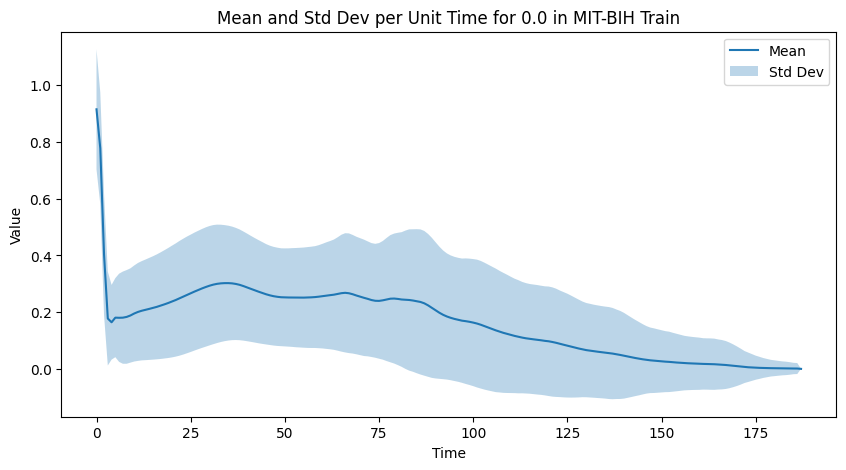

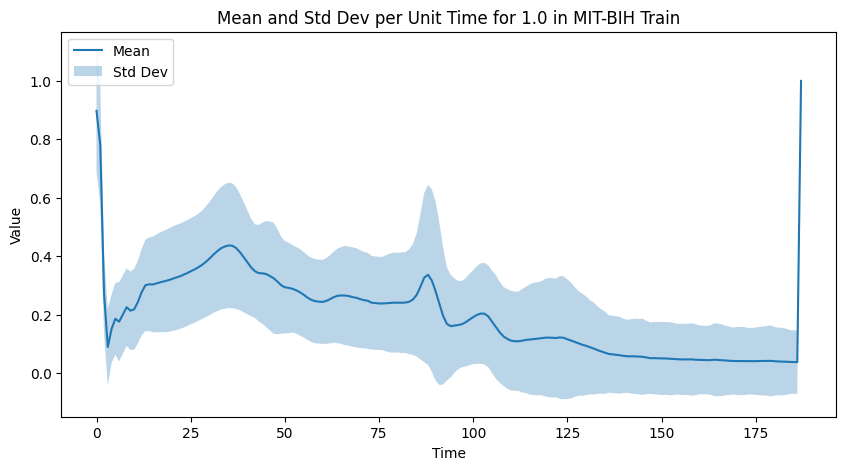

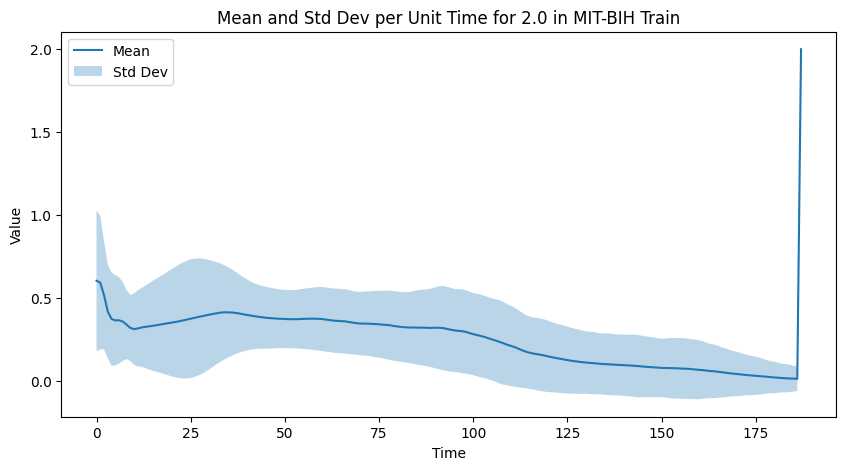

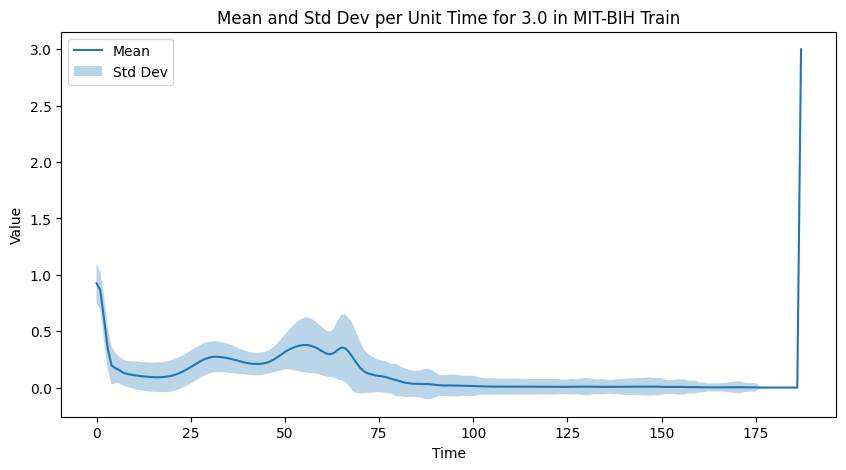

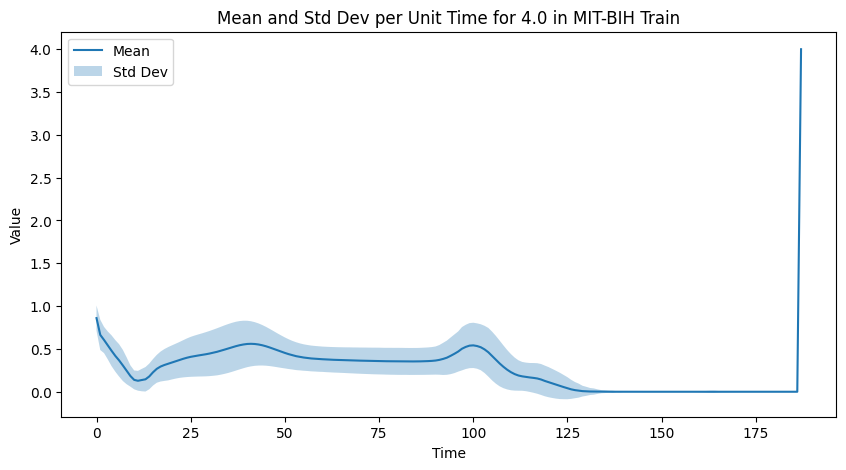

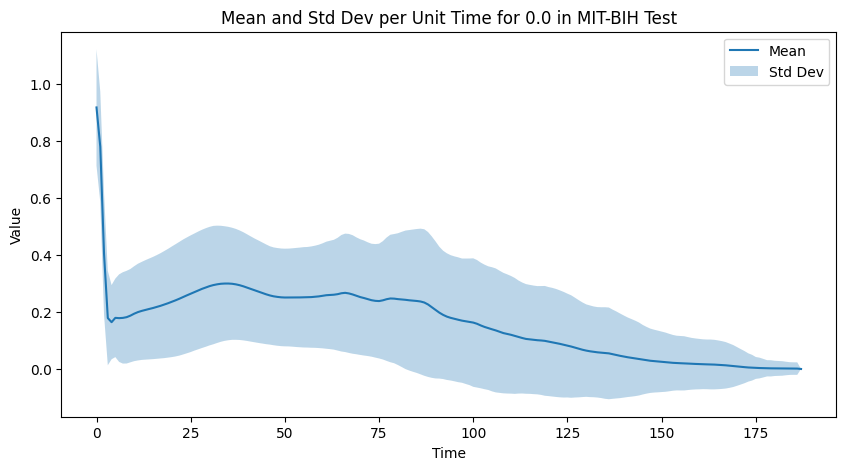

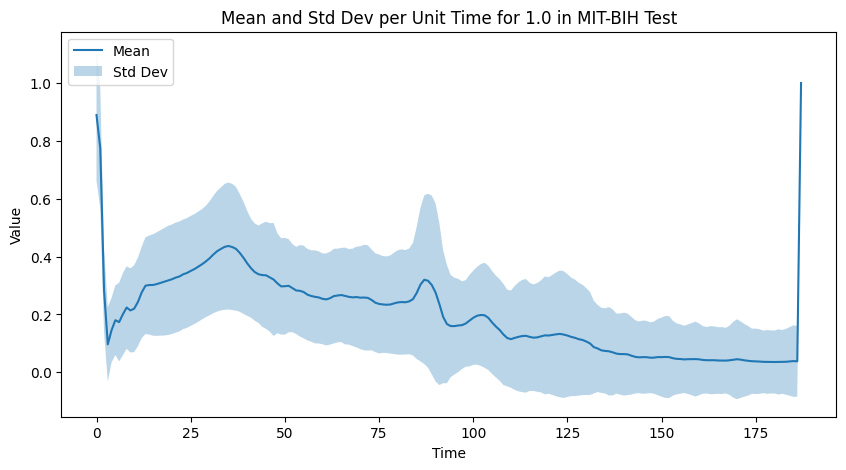

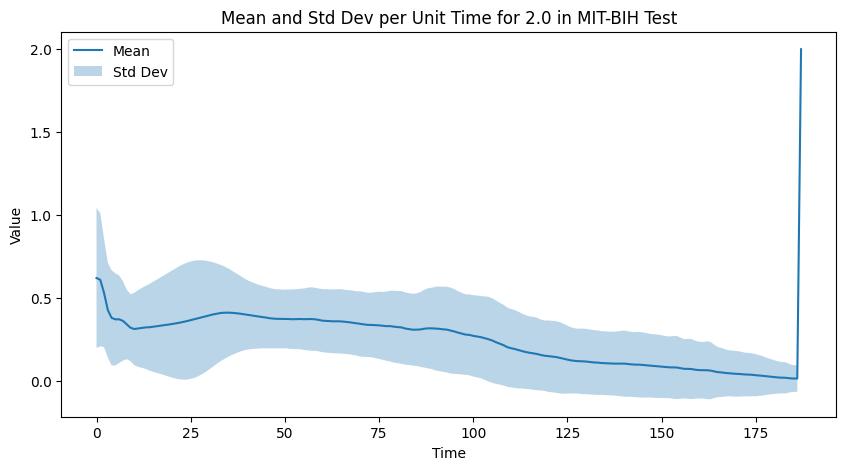

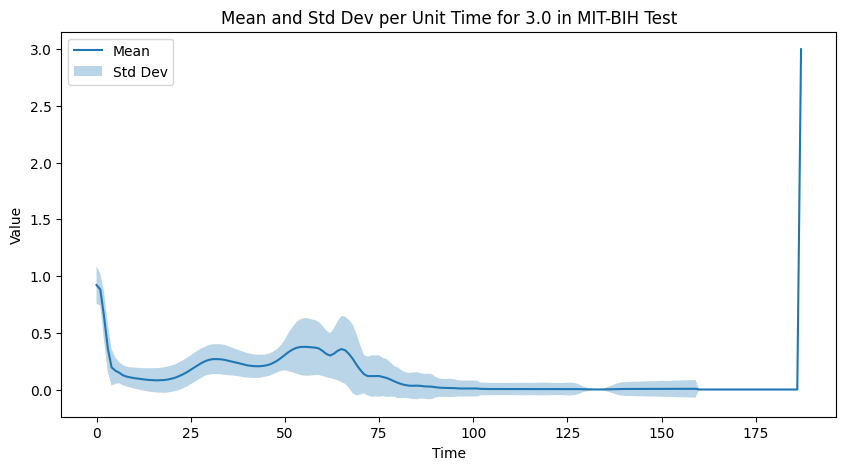

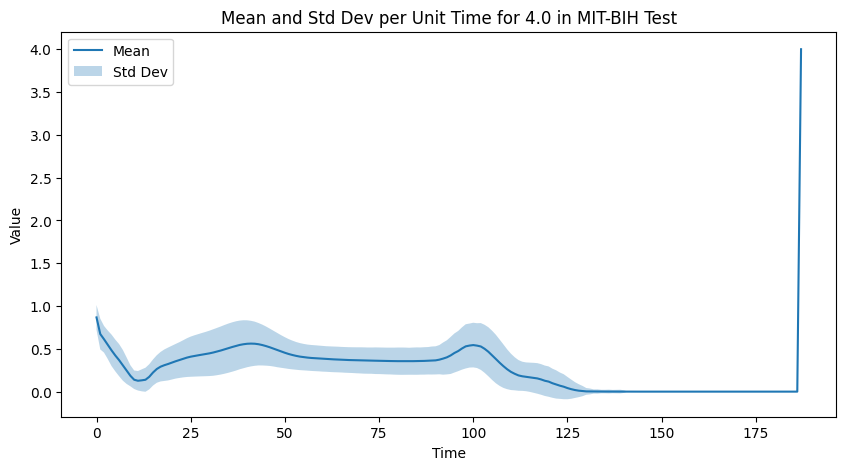

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_std_per_unit_time(dataset, labels, dataset_name):
    unique_categories = labels.unique()
    num_time_units = dataset.shape[1]

    for category in unique_categories:
        category_indices = labels[labels == category].index
        category_data = dataset.iloc[category_indices]

        # Calculate mean and standard deviation per unit of time
        mean_values = category_data.mean(axis=0)
        std_values = category_data.std(axis=0)

        # Plot mean values per unit of time
        plt.figure(figsize=(10, 5))
        plt.plot(range(num_time_units), mean_values, label="Mean")
        plt.fill_between(range(num_time_units), mean_values - std_values, mean_values + std_values, alpha=0.3, label="Std Dev")
        plt.title(f"Mean and Std Dev per Unit Time for {category} in {dataset_name}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        plt.show()

# MIT-BIH dataset
plot_mean_std_per_unit_time(mitbih_train, mitbih_train.iloc[:, -1], "MIT-BIH Train")
plot_mean_std_per_unit_time(mitbih_test, mitbih_test.iloc[:, -1], "MIT-BIH Test")




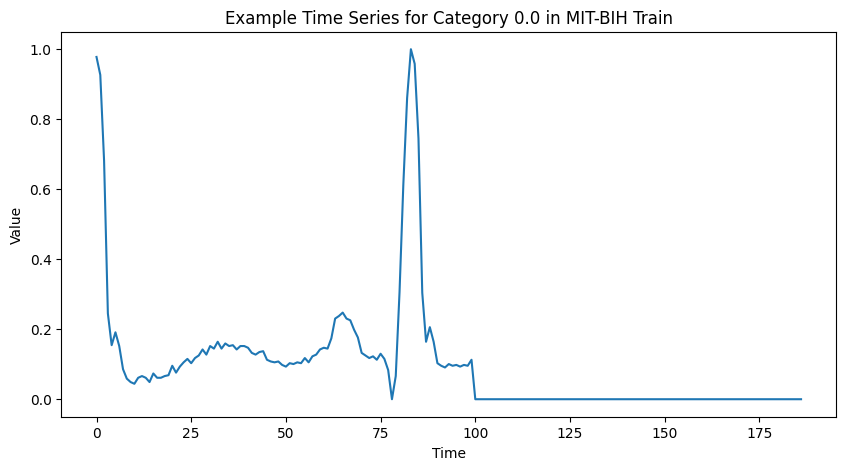

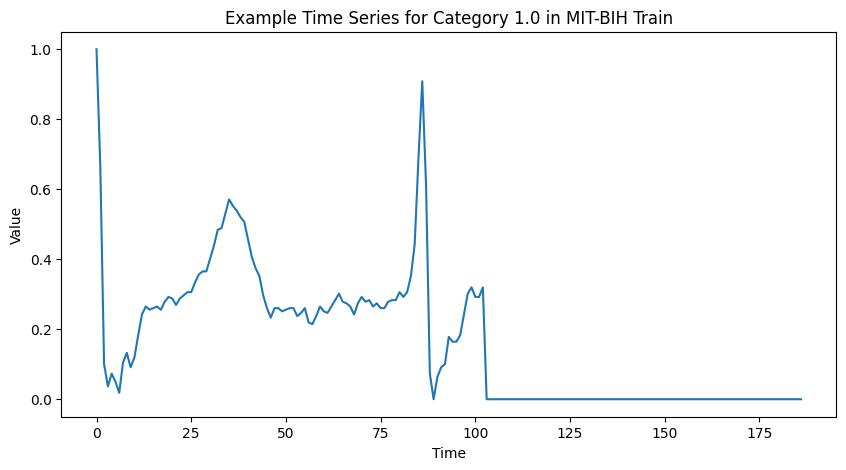

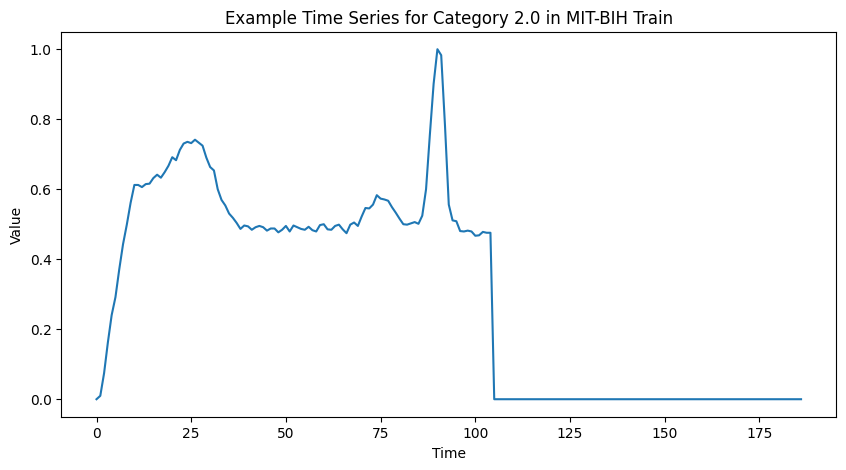

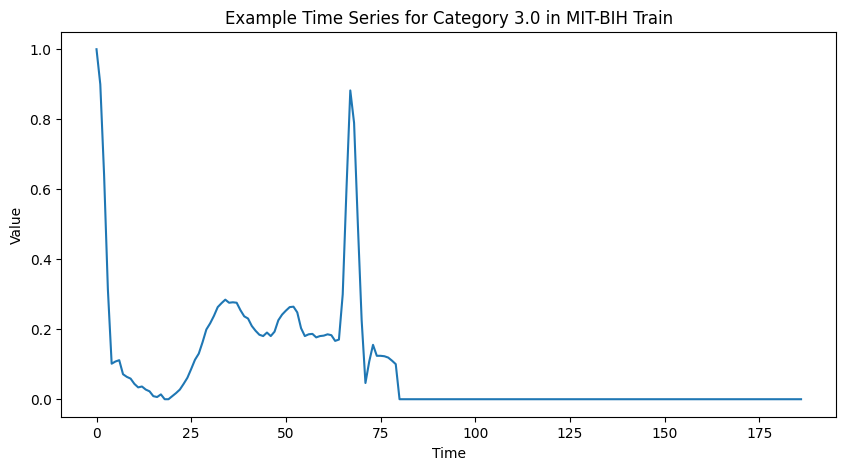

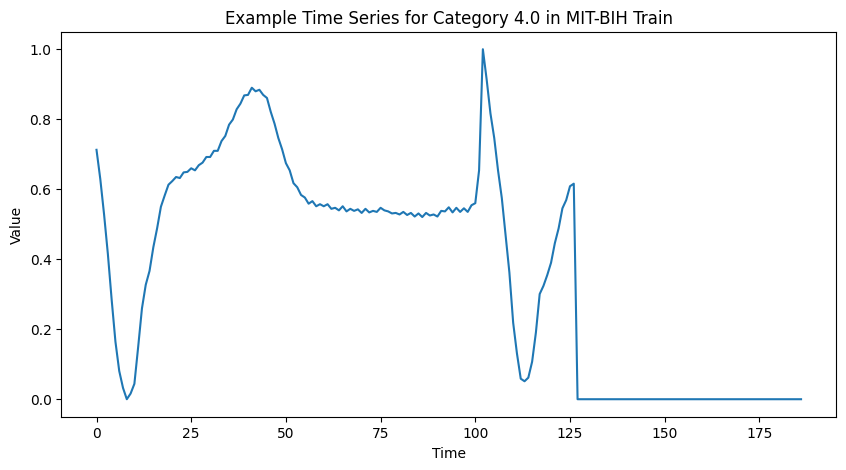

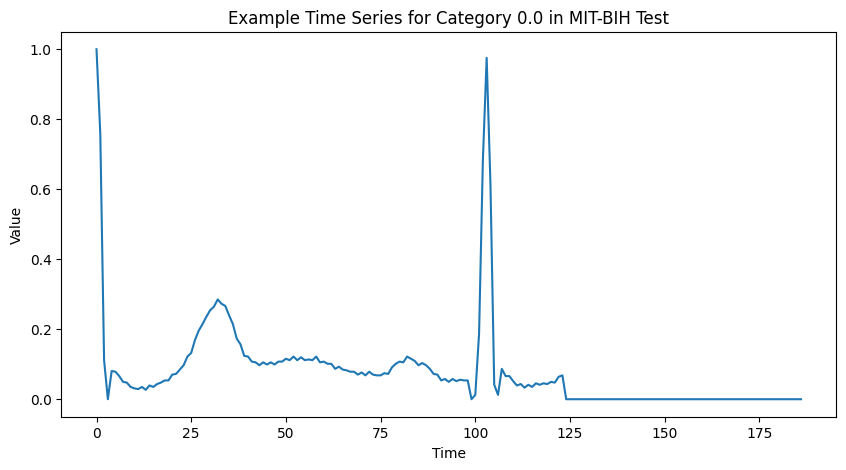

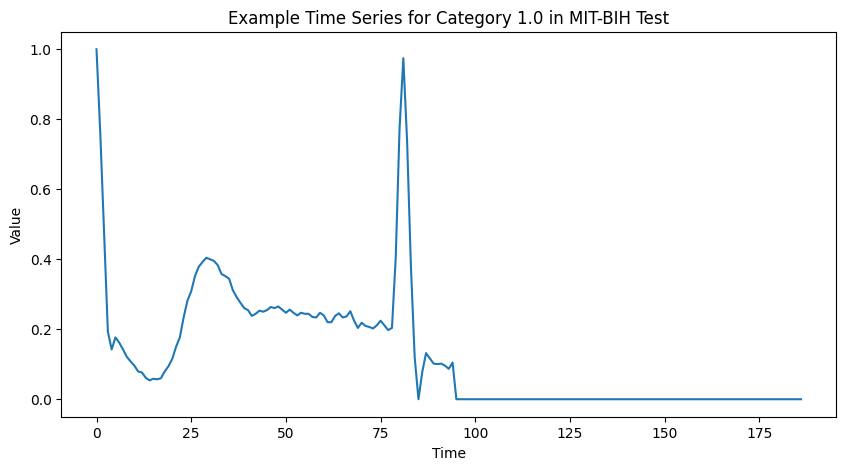

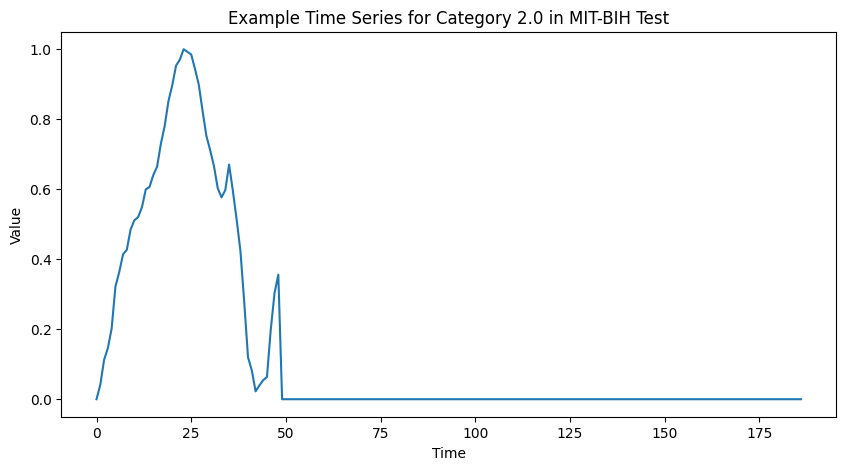

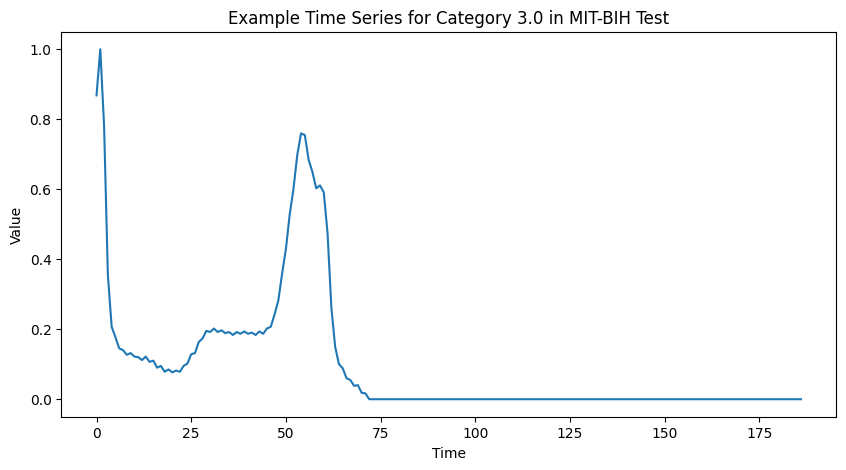

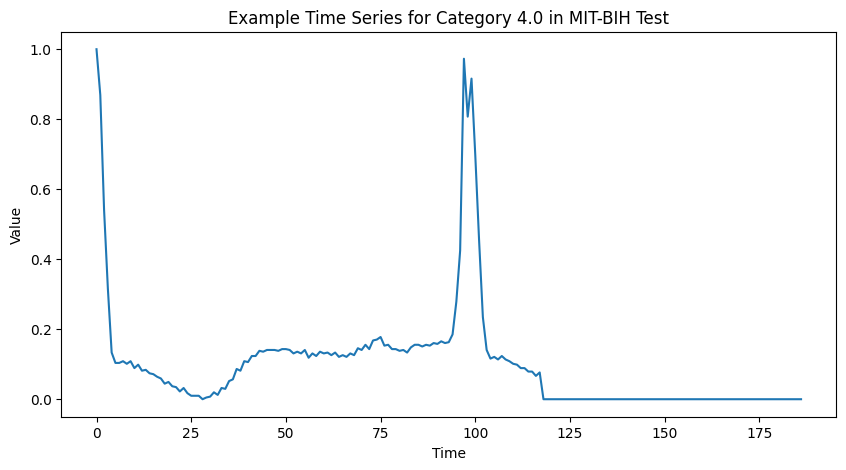

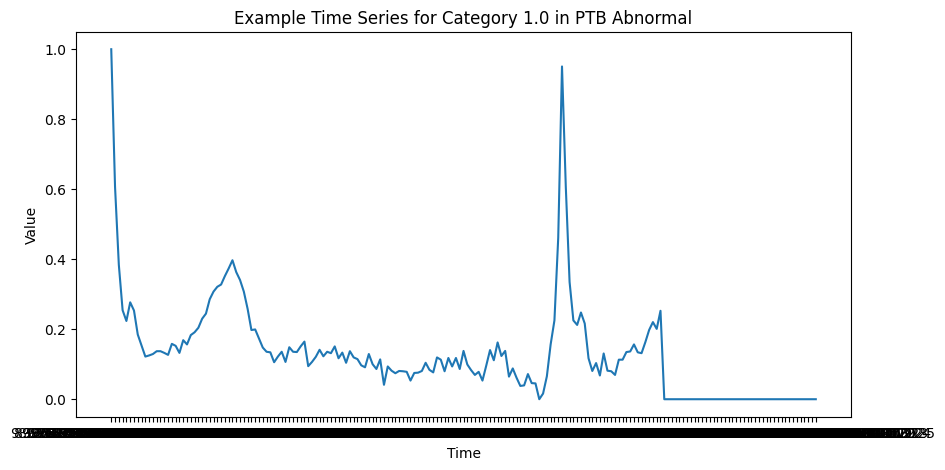

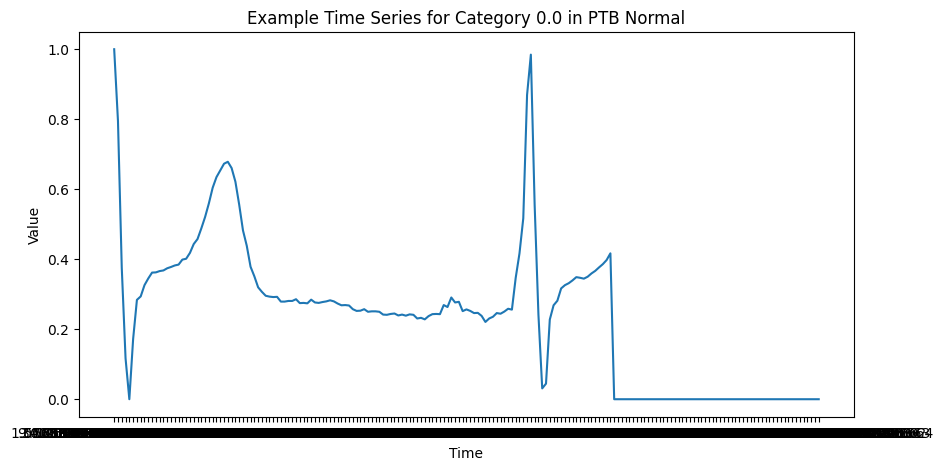

In [19]:
def plot_category_examples(dataset, labels, dataset_name):
    unique_categories = labels.unique()
    for category in unique_categories:
        category_indices = labels[labels == category].index
        category_example_index = category_indices[0]
        category_example = dataset.iloc[category_example_index]

        # Plot time series data
        plt.figure(figsize=(10, 5))
        plt.plot(category_example)
        plt.title(f"Example Time Series for Category {category} in {dataset_name}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.show()

# Get the labels for MIT-BIH train and test sets
mitbih_train_labels = mitbih_train.iloc[:, -1]
mitbih_test_labels = mitbih_test.iloc[:, -1]

# Plot examples for MIT-BIH train set
plot_category_examples(mitbih_train.iloc[:, :-1], mitbih_train_labels, "MIT-BIH Train")

# Plot examples for MIT-BIH test set
plot_category_examples(mitbih_test.iloc[:, :-1], mitbih_test_labels, "MIT-BIH Test")


# Get the labels for PTB abnormal and normal datasets
ptbdb_abnormal_labels = ptbdb_abnormal.iloc[:, -1]
ptbdb_normal_labels = ptbdb_normal.iloc[:, -1]

# Plot examples for PTB abnormal dataset
plot_category_examples(ptbdb_abnormal.iloc[:, :-1], ptbdb_abnormal_labels, "PTB Abnormal")

# Plot examples for PTB normal dataset
plot_category_examples(ptbdb_normal.iloc[:, :-1], ptbdb_normal_labels, "PTB Normal")

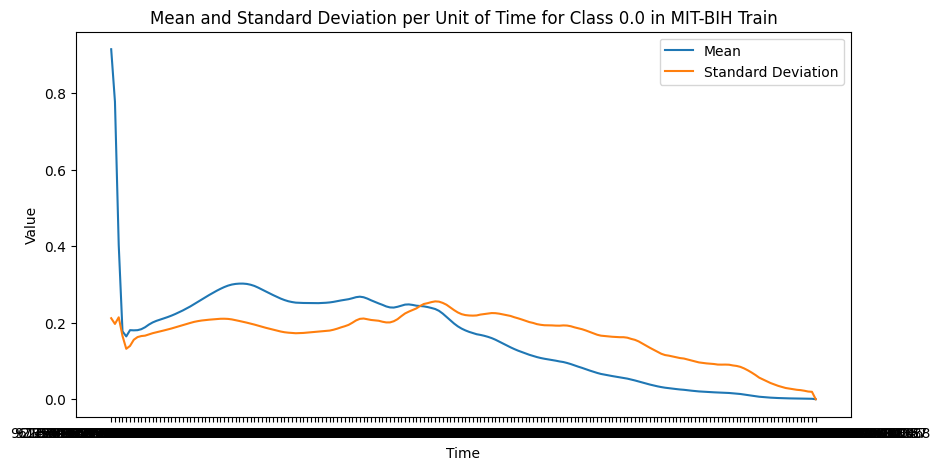

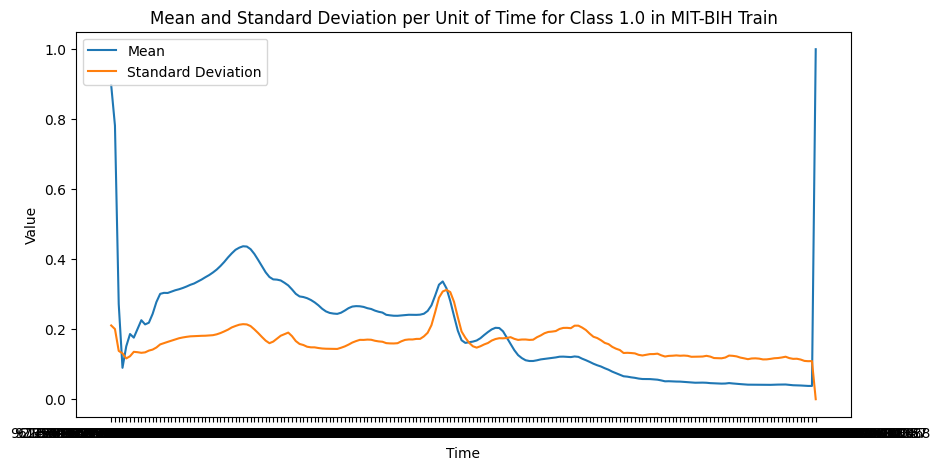

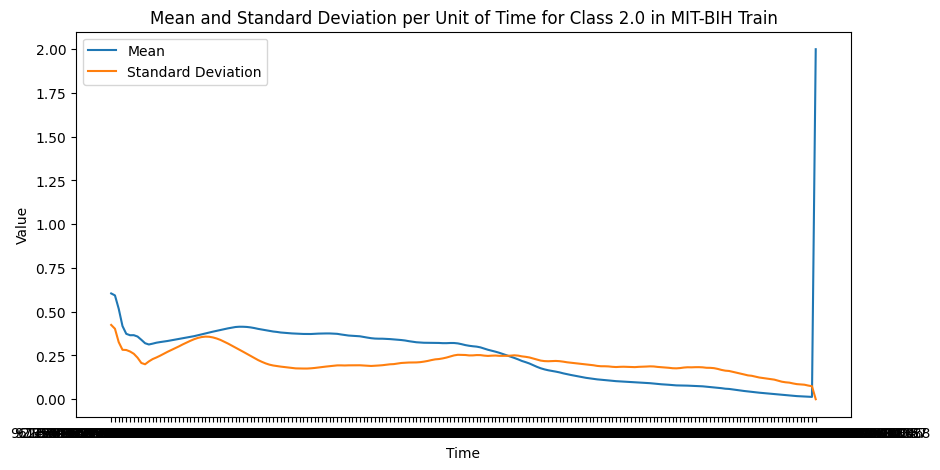

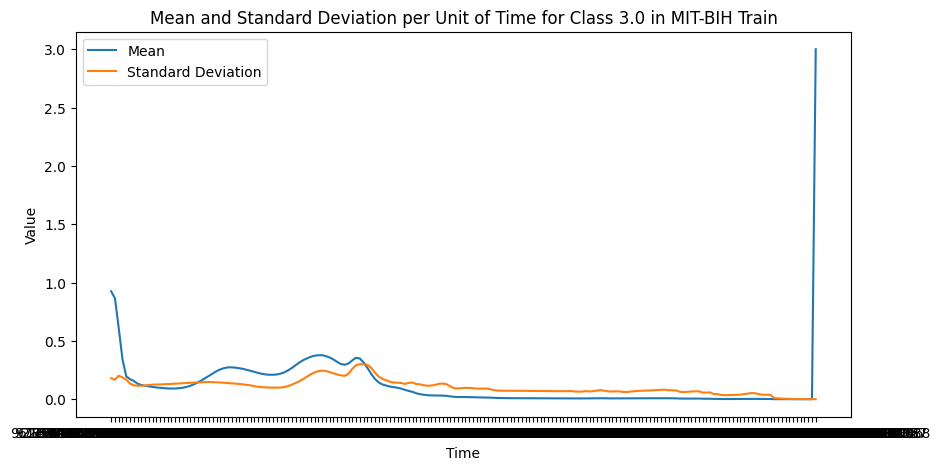

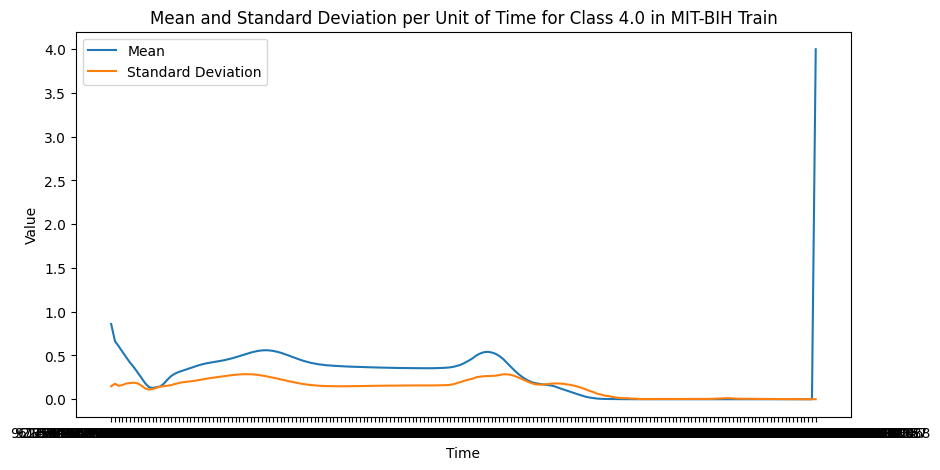

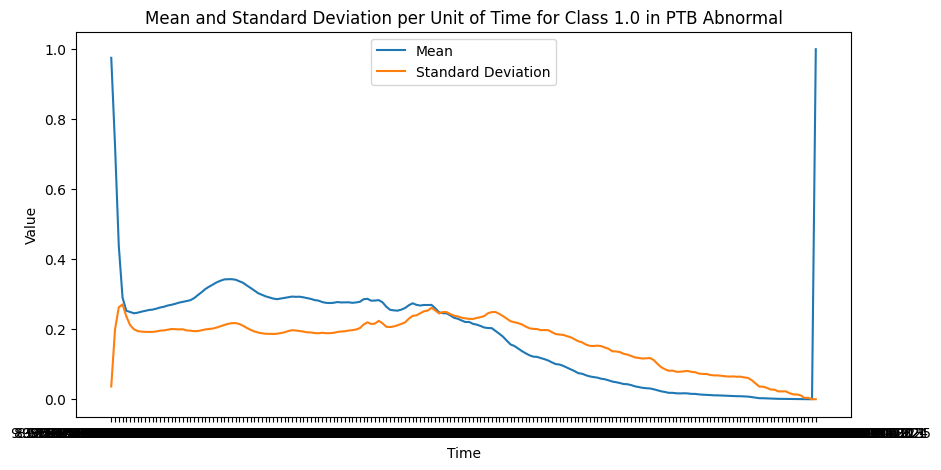

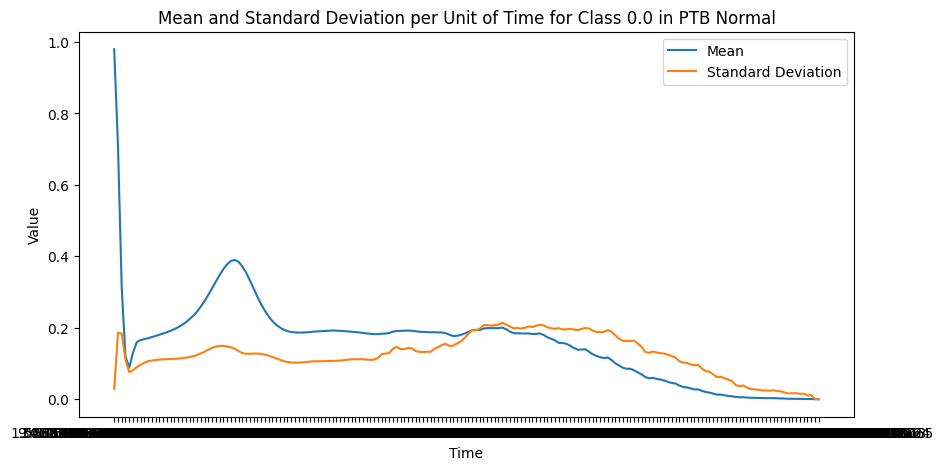

In [4]:
# Function to plot mean and standard deviation per unit of time for each class
def plot_mean_std_per_class(dataset, labels, dataset_name):
    unique_classes = labels.unique()
    for cls in unique_classes:
        cls_indices = labels[labels == cls].index
        cls_data = dataset.iloc[cls_indices]

        mean_data = cls_data.mean(axis=0)
        std_data = cls_data.std(axis=0)

        # Plot mean and standard deviation
        plt.figure(figsize=(10, 5))
        plt.plot(mean_data, label="Mean")
        plt.plot(std_data, label="Standard Deviation")
        plt.title(f"Mean and Standard Deviation per Unit of Time for Class {cls} in {dataset_name}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        plt.show()

# MIT-BIH dataset
plot_mean_std_per_class(mitbih_train, mitbih_train.iloc[:, -1], "MIT-BIH Train")

# PTB dataset
plot_mean_std_per_class(ptbdb_abnormal, ptbdb_abnormal.iloc[:, -1], "PTB Abnormal")
plot_mean_std_per_class(ptbdb_normal, ptbdb_normal.iloc[:, -1], "PTB Normal")

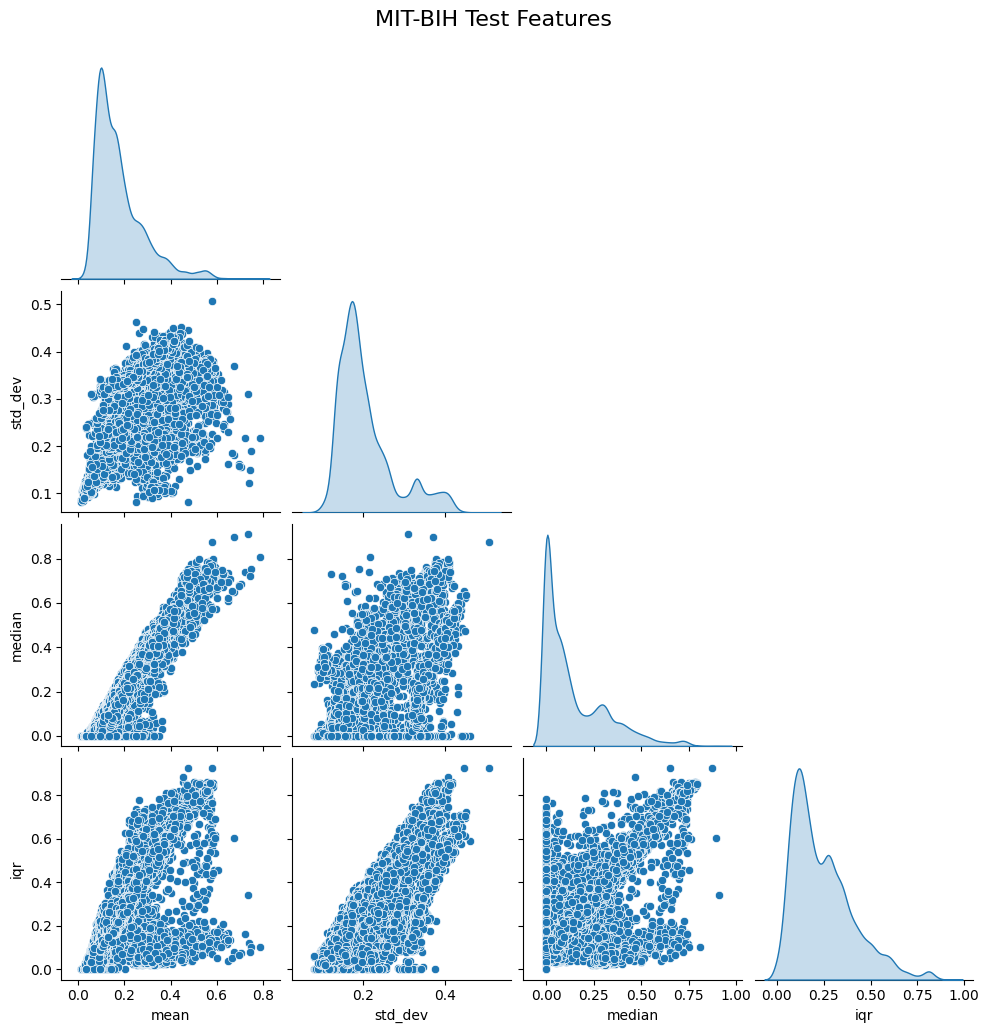

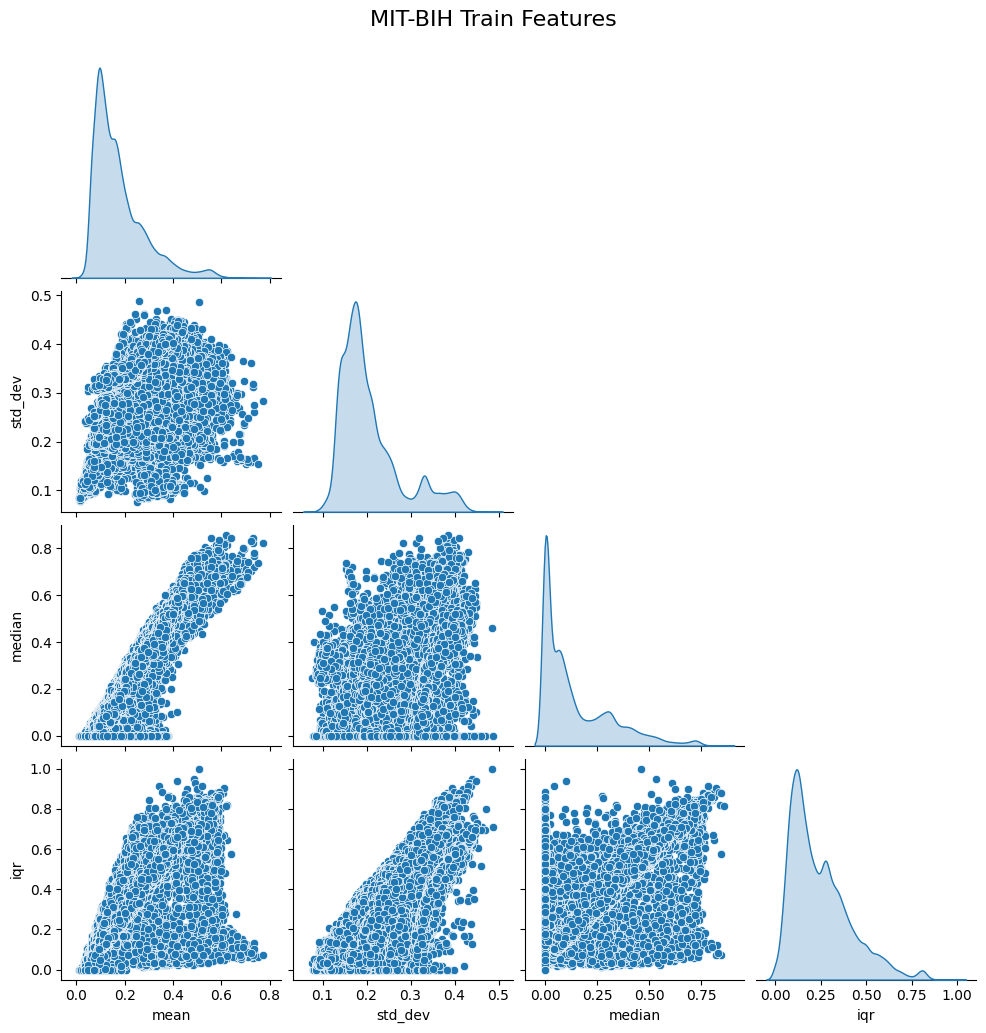

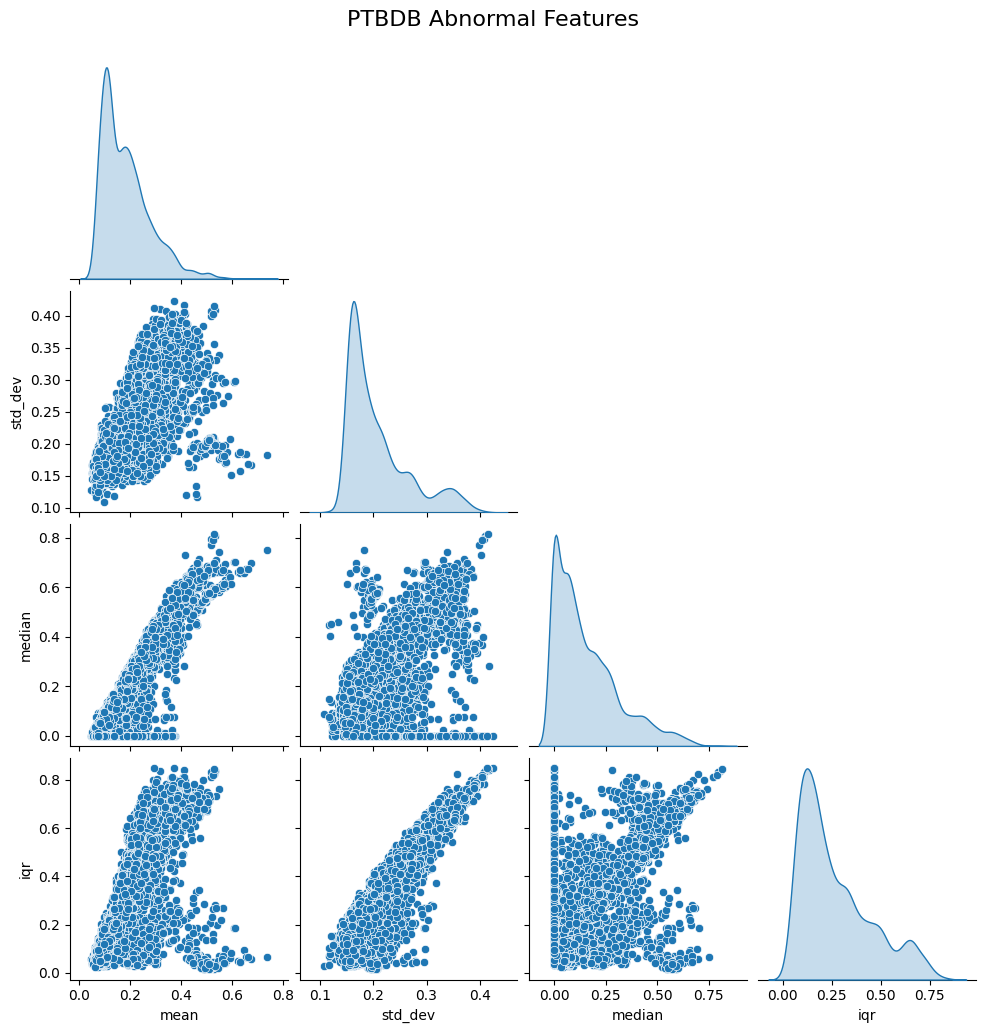

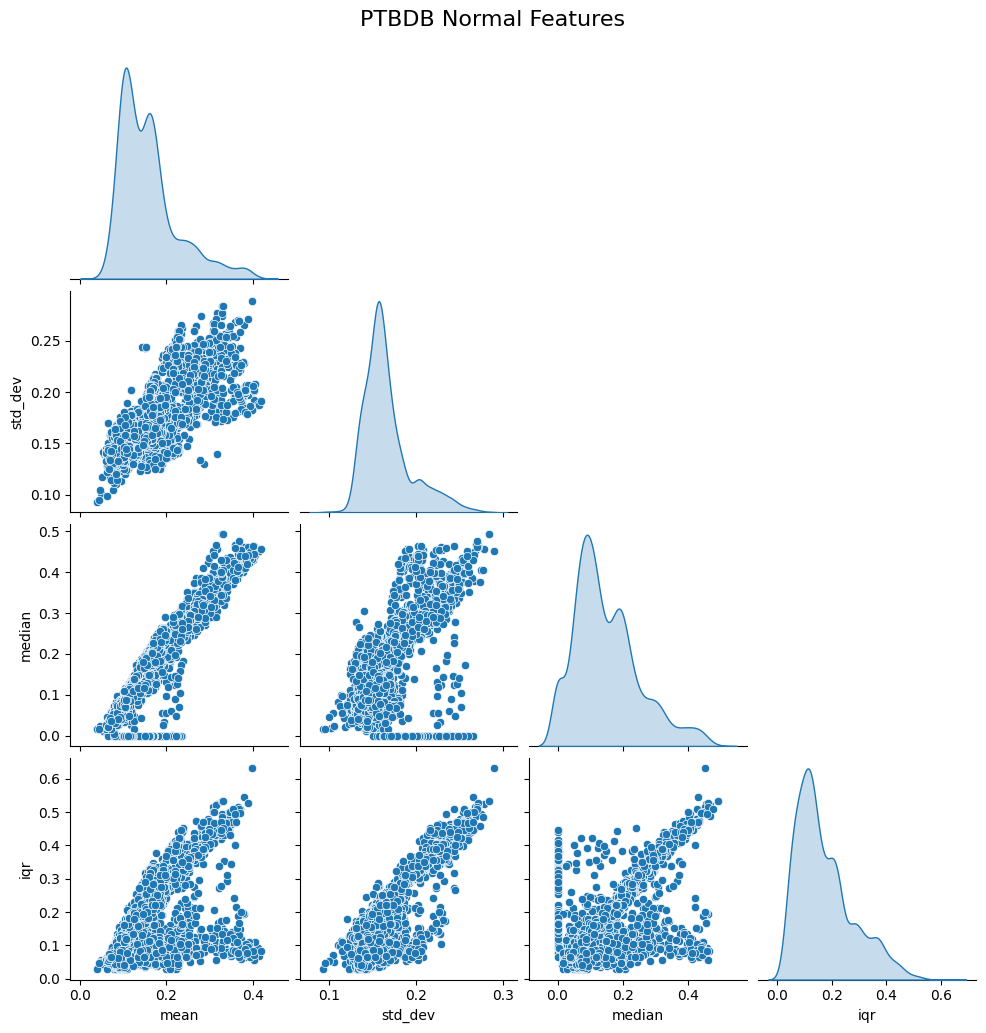

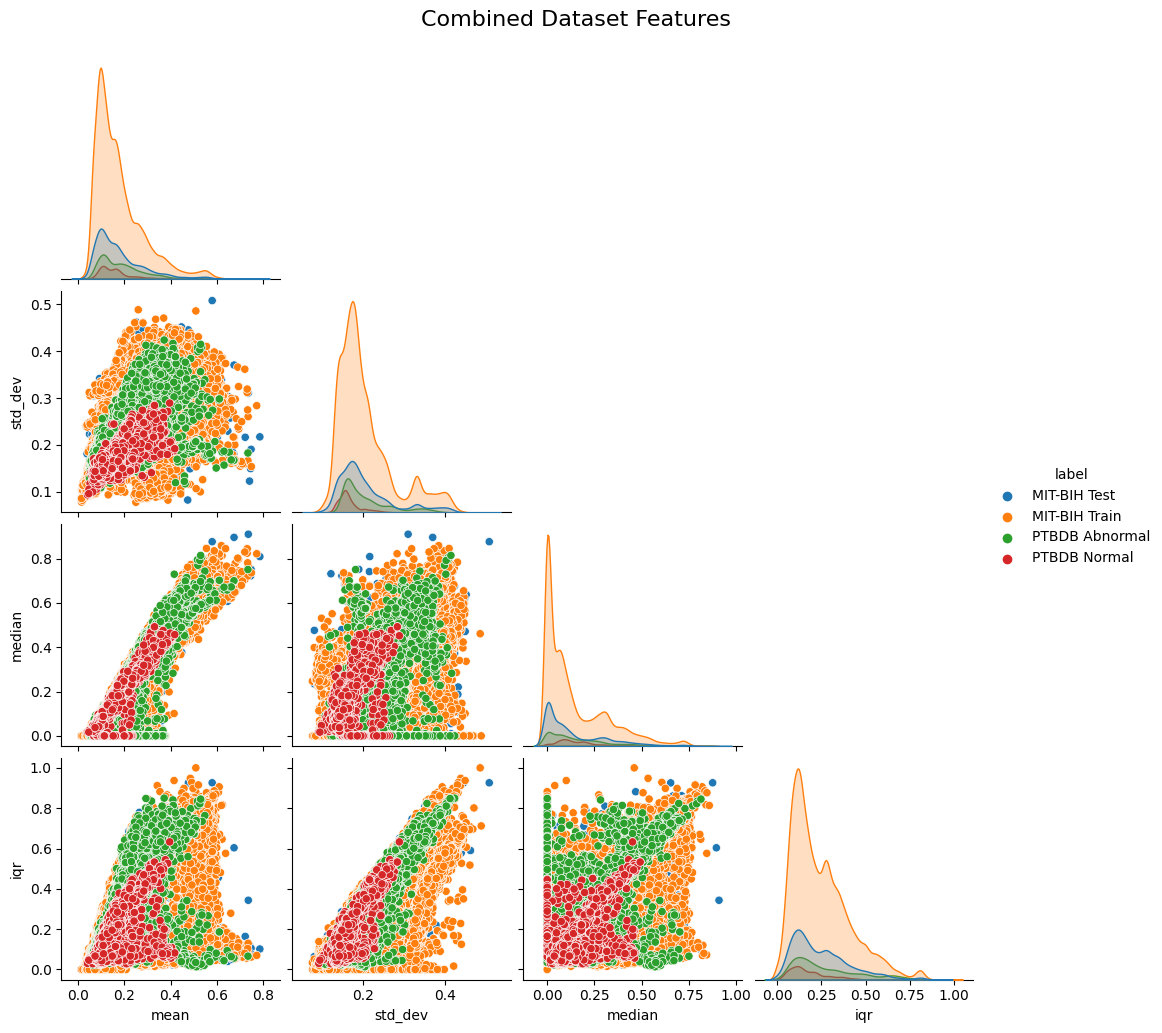

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_features(df):
    mean = df.mean(axis=1)
    std_dev = df.std(axis=1)
    median = df.median(axis=1)
    iqr = df.quantile(0.75, axis=1) - df.quantile(0.25, axis=1)
    return pd.concat([mean, std_dev, median, iqr], axis=1, keys=["mean", "std_dev", "median", "iqr"])

def sliding_window_features(df, window_length, overlap=0.5):
    step = int(window_length * (1 - overlap))
    features = []

    for i in range(0, len(df) - window_length + 1, step):
        window_df = df.iloc[i:i + window_length]
        window_features = extract_features(window_df)
        features.append(window_features)
    
    return pd.concat(features)

def plot_pairplot(features_df, title):
    sns.pairplot(features_df, diag_kind='kde', corner=True)
    plt.suptitle(title, y=1.03, fontsize=16)
    plt.show()

def merge_with_labels(df, label):
    df_copy = df.copy()
    df_copy['label'] = label
    return df_copy

# Load data
mitbih_test = pd.read_csv('ECG/mitbih_test.csv')
mitbih_train = pd.read_csv('ECG/mitbih_train.csv')
ptbdb_abnormal = pd.read_csv('ECG/ptbdb_abnormal.csv')
ptbdb_normal = pd.read_csv('ECG/ptbdb_normal.csv')

# Extract features
mitbih_test_features = extract_features(mitbih_test)
mitbih_train_features = extract_features(mitbih_train)
ptbdb_abnormal_features = extract_features(ptbdb_abnormal)
ptbdb_normal_features = extract_features(ptbdb_normal)

# Sliding window features
window_length = 40
mitbih_test_sw_features = sliding_window_features(mitbih_test, window_length)
mitbih_train_sw_features = sliding_window_features(mitbih_train, window_length)
ptbdb_abnormal_sw_features = sliding_window_features(ptbdb_abnormal, window_length)
ptbdb_normal_sw_features = sliding_window_features(ptbdb_normal, window_length)

# Merge datasets with labels
mitbih_test_labeled = merge_with_labels(mitbih_test_features, 'MIT-BIH Test')
mitbih_train_labeled = merge_with_labels(mitbih_train_features, 'MIT-BIH Train')
ptbdb_abnormal_labeled = merge_with_labels(ptbdb_abnormal_features, 'PTBDB Abnormal')
ptbdb_normal_labeled = merge_with_labels(ptbdb_normal_features, 'PTBDB Normal')

# Combine all datasets
combined_data = pd.concat([mitbih_test_labeled, mitbih_train_labeled, ptbdb_abnormal_labeled, ptbdb_normal_labeled], ignore_index=True)

# Plot pairplots for each dataset
plot_pairplot(mitbih_test_features, "MIT-BIH Test Features")
plot_pairplot(mitbih_train_features, "MIT-BIH Train Features")
plot_pairplot(ptbdb_abnormal_features, "PTBDB Abnormal Features")
plot_pairplot(ptbdb_normal_features, "PTBDB Normal Features")

# Plot pairplot for the combined dataset
sns.pairplot(combined_data, hue='label', diag_kind='kde', corner=True)
plt.suptitle("Combined Dataset Features", y=1.03, fontsize=16)
plt.show()